In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score

In [2]:

data_path = 'data/data-science-london-scikit-learn/'
train= pd.read_csv(data_path + 'train.csv',header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [3]:
trainLabels = pd.read_csv(data_path + 'trainLabels.csv',header=None)

In [4]:
test = pd.read_csv(data_path + 'test.csv',header=None)

In [5]:
train.shape

(1000, 40)

In [6]:
train.describe()    

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train,trainLabels, test_size = 0.30, random_state = 1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((700, 40), (300, 40), (700, 1), (300, 1))

In [8]:
#SVM
from sklearn.svm import SVC

svc_model = SVC(gamma = 'auto')
svc_model.fit(x_train,y_train.values.ravel())
svc_predicted = svc_model.predict(x_test)
print('SVM',accuracy_score(y_test, svc_predicted))

SVM 0.9133333333333333


In [10]:
#XGBOOST
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train,y_train.values.ravel())
xgb_predicted = xgb.predict(x_test)
print('XGBoost',accuracy_score(y_test, xgb_predicted))

ModuleNotFoundError: No module named 'xgboost'

In [11]:
svc_model = SVC(gamma = 'auto')
svc_model.fit(x_train,y_train.values.ravel())
svc_predicted_test= svc_model.predict(test)

In [12]:
best_pred = pd.DataFrame(svc_predicted_test)

best_pred.index += 1

best_pred.columns = ['Solution']
best_pred['Id'] = np.arange(1,best_pred.shape[0]+1)
best_pred = best_pred[['Id', 'Solution']]

best_pred.to_csv(data_path + 'Submission.csv',index=False)

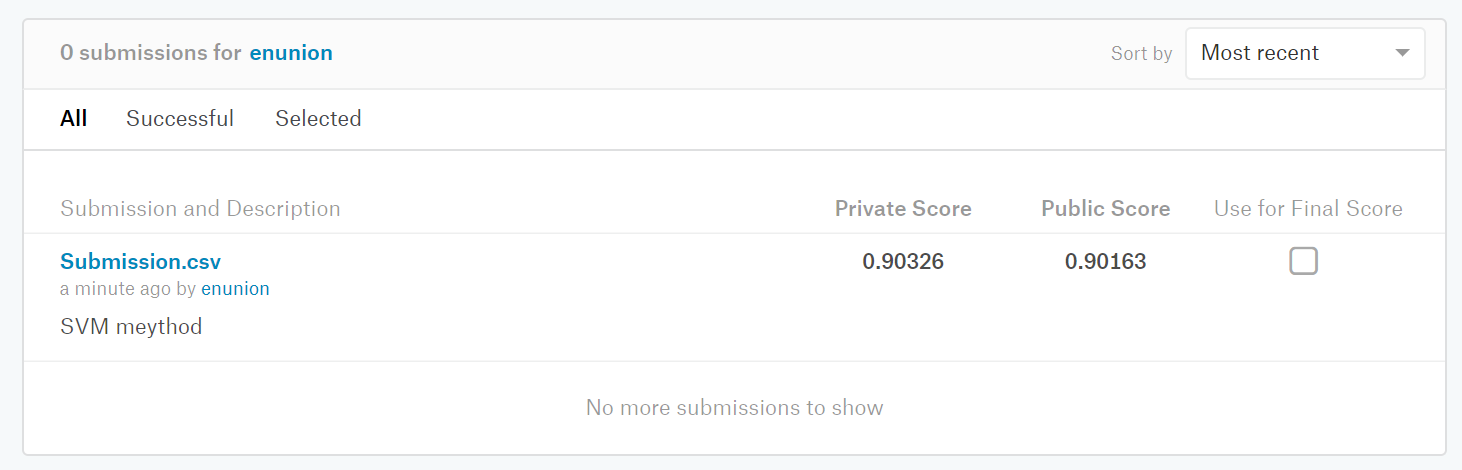